# Statistical analysis between coastal and adjacent ocean cells around Tasmania

## Importing packages

In [1]:
from datetime import date 
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.ndimage as ndimage
from scipy.ndimage import convolve
from scipy.ndimage.measurements import label, find_objects
import xarray as xr

## Opening the mask file

In [2]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/static_era5.nc').sel(longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
mask = xr.where(ds.lsm==0, 0, 1)
mask

<xarray.DataArray 'lsm' (time: 1, latitude: 21, longitude: 21)>
array([[[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])
Coordinates:
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * time       (time) datetime64[ns] 2000-01-01

## Finding coastal cells
Using scipy.ndimage convolve

k is an array of weights, with the same number of dimensions as input

In [3]:
k =([[[1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]]])

input array 'mask' is convolved with 'k', mode='constant' which ensures that the input is extended by filling all values beyond the edge with the same constant value

In [4]:
c = convolve(mask, k, mode='constant')

In [5]:
c

array([[[1, 2, 0, 0, 0, 0, 1, 2, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1, 0, 0],
        [3, 4, 1, 0, 0, 0, 1, 3, 4, 6, 7, 8, 8, 7, 6, 5, 5, 3, 2, 0, 0],
        [4, 4, 2, 0, 0, 0, 0, 1, 2, 5, 6, 8, 8, 8, 8, 8, 8, 5, 3, 0, 0],
        [5, 5, 3, 0, 0, 0, 0, 0, 0, 2, 3, 5, 5, 6, 7, 8, 8, 6, 4, 1, 0],
        [4, 5, 4, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 4, 5, 7, 8, 7, 4, 2, 0],
        [2, 5, 4, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 8, 5, 3, 0],
        [1, 4, 5, 8, 8, 6, 5, 2, 1, 0, 1, 2, 3, 3, 5, 6, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 7, 6, 4, 4, 3, 4, 4, 5, 5, 6, 7, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 7, 6, 5, 6, 7, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 1],
        [0, 0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

coastal array is 1 when the mask==1 and the sum of neighbouring cells is < 8 (which means at least one cell is neighbouring a 0 (or sea grid cell)

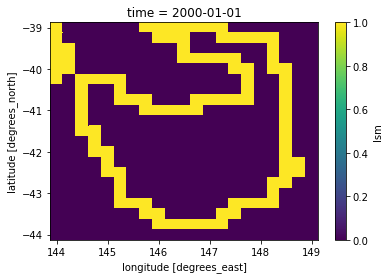

In [6]:
coastal = np.logical_and(mask == 1, c < 8)
coastal.astype(int).plot()

In [7]:
def fix(ds):
    # This function makes the original data array repeatable so that it matches with the shape of the other data array.

    trial = ds
    i = 0
    while i < 13514:  # <-- Here, 13514 corresponds to the timesteps in land dataset 
        trial = xr.concat([trial, ds], 'time')
        i+=1
    trial = trial.isel(time = slice(0,13514))
    # to specify the dates/time 
    trial.coords['time'] = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1) 
    
    t = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1)
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    
    trial.coords['time'] = dates

    return trial

In [8]:
new_coastal = fix(coastal)  # new_coastal will now have the same shape as anom 

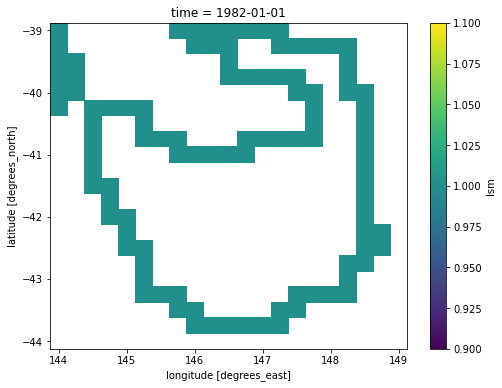

In [9]:
coast_grids = new_coastal.where(new_coastal != 0)
coast_grids
coast_grids.isel(time=0).plot(figsize=(8,6))

#plt.savefig('tasmania-coastal-cells')

In [10]:
coast_grids

<xarray.DataArray 'lsm' (time: 13514, latitude: 21, longitude: 21)>
array([[[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31

In [11]:
coast_sel_stacked = coast_grids.stack(latlon=('latitude', 'longitude')).dropna(dim='latlon')
# this stacks all lat, lon pairs corresponding to the coastal cells 

In [12]:
coast_sel_stacked

<xarray.DataArray 'lsm' (time: 13514, latlon: 102)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
  - longitude  (latlon) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2

In [13]:
#coast_sel_stacked.unstack().reindex(longitude=sorted(coast_grids.longitude)).isel(time=0).plot()

## Anomaly datasets

In [39]:
import pandas as pd

In [53]:
data = np.random.randint(low=0, high=2, size=(102, 13514))
locs = range(0, 102)
times = pd.date_range('1982-01-01', periods=13514)
thw_new = xr.DataArray(data, coords=[locs, times], dims=['ncell', 'time'])

In [54]:
thw_new

<xarray.DataArray (ncell: 102, time: 13514)>
array([[1, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1]])
Coordinates:
  * ncell    (ncell) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31

In [55]:
data = np.random.randint(low=0, high=2, size=(102, 13514))
locs = range(0, 102)
times = pd.date_range('1982-01-01', periods=13514)
mhw_new = xr.DataArray(data, coords=[locs, times], dims=['ncell', 'time'])

In [56]:
mhw_new

<xarray.DataArray (ncell: 102, time: 13514)>
array([[1, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1]])
Coordinates:
  * ncell    (ncell) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31

In [57]:
combined = thw_new + mhw_new

In [58]:
combined

<xarray.DataArray (ncell: 102, time: 13514)>
array([[2, 2, 2, ..., 1, 0, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 2, 1],
       [1, 0, 2, ..., 1, 1, 1],
       [1, 2, 2, ..., 0, 1, 2]])
Coordinates:
  * ncell    (ncell) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31

In [59]:
n = 13514
thw_proportion_cooccurring = []
thw_proportion_noncooccurring = []
for ncell in thw_new.ncell.values:
    a = sum(thw_new[ncell]==1)
    c = sum(combined[ncell]==2)
    d = a-c
    co = c/a  
    nco = d/a
    thw_proportion_cooccurring.append(co)
    thw_proportion_noncooccurring.append(nco)

In [61]:
n = 13514
mhw_proportion_cooccurring = []
mhw_proportion_noncooccurring = []
for ncell in thw_new.ncell.values:
    b = sum(mhw_new[ncell]==1)
    c = sum(combined[ncell]==2)
    e = b-c
    co = c/b  
    nco = e/b
    mhw_proportion_cooccurring.append(co)
    mhw_proportion_noncooccurring.append(nco)


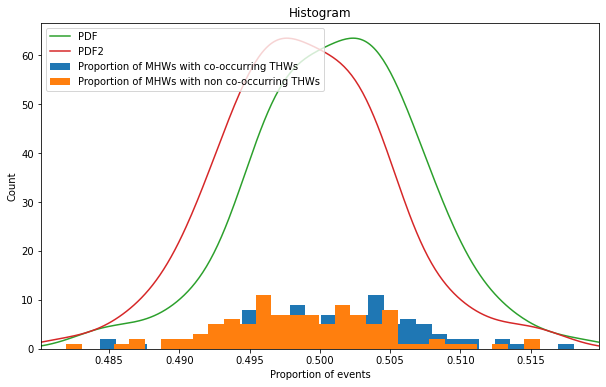

In [62]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(mhw_proportion_cooccurring, density=False, bins=30, label="Proportion of MHWs with co-occurring THWs")
plt.hist(mhw_proportion_noncooccurring, density=False, bins=30, label="Proportion of MHWs with non co-occurring THWs")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde_a = st.gaussian_kde(mhw_proportion_cooccurring)
kde_b = st.gaussian_kde(mhw_proportion_noncooccurring)
plt.plot(kde_xs, kde_a.pdf(kde_xs), label="PDF")
plt.plot(kde_xs, kde_b.pdf(kde_xs), label="PDF2")
plt.legend(loc="upper left")
plt.ylabel('Count')
plt.xlabel('Proportion of events')
plt.title("Histogram")
plt.savefig('histo-new-mhw')

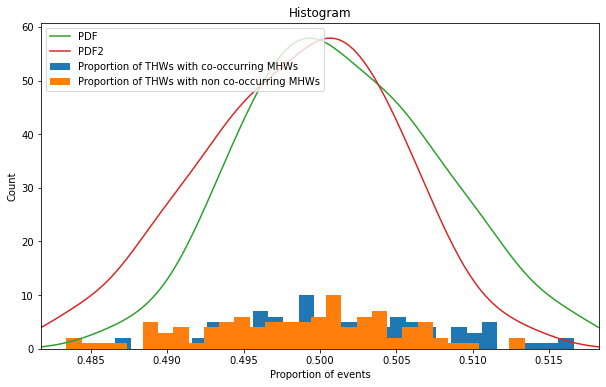

In [63]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(thw_proportion_cooccurring, density=False, bins=30, label="Proportion of THWs with co-occurring MHWs")
plt.hist(thw_proportion_noncooccurring, density=False, bins=30, label="Proportion of THWs with non co-occurring MHWs")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde_a = st.gaussian_kde(thw_proportion_cooccurring)
kde_b = st.gaussian_kde(thw_proportion_noncooccurring)
plt.plot(kde_xs, kde_a.pdf(kde_xs), label="PDF")
plt.plot(kde_xs, kde_b.pdf(kde_xs), label="PDF2")
plt.legend(loc="upper left")
plt.ylabel('Count')
plt.xlabel('Proportion of events')
plt.title("Histogram")
plt.savefig('histo-new')